<a href="https://colab.research.google.com/github/josh5139/Secureonlineelectionsystemjosh/blob/main/Customers_Feedback_sentiment_Analyzer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PHASE – 1

1. Introduction

Customer feedback provides important insights into how customers feel about products or services. However, reading thousands of comments manually is slow, inconsistent, and expensive.
To solve this, we build an automatic Sentiment Analyzer that classifies customer feedback into:

Happy (Positive)

Unhappy (Negative)

Neutral

This machine learning model uses text preprocessing, TF-IDF vectorization, and Multinomial Naïve Bayes, which is highly effective for text classification.

2. Statement of the Problem

Large organizations receive massive amounts of customer feedback every day.
The challenges include:

Hard to manually read all comments

Human interpretation is subjective

Slow processing

No quick insight for decision-making

Thus, an automated sentiment classification system is required to accurately and quickly categorize feedback.

3. Objectives

General Objective

To develop a machine learning model that automatically classifies customer feedback as happy, unhappy, or neutral.

Specific Objectives

Collect customer feedback dataset from Kaggle (already uploaded as customer_sentiment).

Preprocess and clean textual data.

Convert text into numerical features using TF-IDF.

Train a sentiment classification model using Multinomial Naïve Bayes.

Evaluate model performance using accuracy, precision, recall, F1-score, and confusion matrix.

Discuss findings and propose improvements.

4. Methodology

4.1 Data Collection

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Customer_Sentiment (1).csv")
print(df.shape)

(25000, 13)


In [19]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import pandas as pd

df = pd.read_csv('/content/Customer_Sentiment (1).csv')

In [22]:
display(df.head())

,customer_id,gender,age_group,region,product_category,purchase_channel,platform,customer_rating,review_text,sentiment,response_time_hours,issue_resolved,complaint_registered
0,1,male,60+,north,automobile,online,flipkart,1,very disappointed with the quality.,negative,46,yes,yes
1,2,other,46-60,central,books,online,swiggy instamart,5,fast delivery and great packaging.,positive,5,yes,no
2,3,female,36-45,east,sports,online,facebook marketplace,1,very disappointed with the quality.,negative,38,yes,yes
3,4,female,18-25,central,groceries,online,zepto,2,product stopped working after few days.,negative,16,yes,yes
4,5,female,18-25,east,electronics,online,croma,3,neutral about the quality.,neutral,15,yes,no


4.2 Data Analysis (Pre-processing)

4.2.1 Check dataset structure

In [23]:
# -- BASIC DATA ANALYSIS --

# List all column names
print("Columns:", df.columns)

# Count missing values in each column
print("\nMissing values:")
print(df.isnull().sum())

# Check the distribution of sentiment labels
print("\nSentiment distribution:")
print(df['sentiment'].value_counts())


Columns: Index(['customer_id', 'gender', 'age_group', 'region', 'product_category',
       'purchase_channel', 'platform', 'customer_rating', 'review_text',
       'sentiment', 'response_time_hours', 'issue_resolved',
       'complaint_registered'],
      dtype='object')

Missing values:
customer_id             0
gender                  0
age_group               0
region                  0
product_category        0
purchase_channel        0
platform                0
customer_rating         0
review_text             0
sentiment               0
response_time_hours     0
issue_resolved          0
complaint_registered    0
dtype: int64

Sentiment distribution:
sentiment
positive    9978
negative    9937
neutral     5085
Name: count, dtype: int64


4.2.2 Text Cleaning & Preprocessing

In [24]:
# -- TEXT PREPROCESSING --

import re   # Regular expressions library

# Function to clean text
def clean_text(text):
    text = str(text).lower()                                        # Convert text to lowercase
    text = re.sub(r"http\S+", " ", text)                            # Remove URLs
    text = re.sub(r"@\w+", " ", text)                               # Remove @mentions
    text = re.sub(r"[^a-z0-9\s']", " ", text)                       # Remove punctuation/special characters
    text = re.sub(r"\s+", " ", text).strip()                        # Remove extra spaces
    return text

# Apply cleaning function on the review text column
df['clean_text'] = df['review_text'].apply(clean_text)

# Show cleaned text
df[['review_text','clean_text']].head()


,review_text,clean_text
0,very disappointed with the quality.,very disappointed with the quality
1,fast delivery and great packaging.,fast delivery and great packaging
2,very disappointed with the quality.,very disappointed with the quality
3,product stopped working after few days.,product stopped working after few days
4,neutral about the quality.,neutral about the quality


4.3 Model Selection

Why Multinomial Naïve Bayes Works Well for Text Classification
Best for text classification

It’s specifically designed for discrete features like word counts or TF-IDF values, making it a natural fit for NLP tasks such as sentiment analysis, spam detection, or topic categorization.

Fast training

Training is essentially just counting word frequencies and applying Bayes’ theorem. This makes it computationally lightweight compared to more complex models like SVMs or deep learning.

Handles large vocabulary well

Even if your dataset has thousands of unique words, Naïve Bayes scales efficiently. It doesn’t require heavy optimization or iterative training loops.

Strong performance with TF-IDF

Combining TF-IDF with Multinomial Naïve Bayes often boosts accuracy because TF-IDF reduces the impact of very common words (like “the”, “and”) while highlighting more informative terms.

  Performance measurement

Accuracy

Proportion of correctly classified samples out of all samples.

Good for balanced datasets, but misleading if classes are imbalanced.

Precision

Of all samples predicted as positive, how many are truly positive.

Useful when false positives are costly (e.g., spam detection).

Recall (Sensitivity)

Of all actual positive samples, how many were correctly identified.

Important when missing positives is costly (e.g., medical diagnosis).

F1-Score

Harmonic mean of precision and recall.

Balances both metrics, especially useful for imbalanced datasets.

Confusion Matrix

Table showing counts of true positives, false positives, true negatives, and false negatives.

Helps visualize where the model makes mistakes.

PHASE – 2

5. Model Analysis

Model Training + Cross-validation

In [28]:
# -- TRAIN MULTINOMIAL NAIVE BAYES --

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

# Initialize Naive Bayes model
nb = MultinomialNB()

# Train model
nb.fit(X_train_tfidf, y_train)

# 5-fold cross validation using macro-F1
cv_scores = cross_val_score(nb, X_train_tfidf, y_train, cv=5, scoring='f1_macro')

print("Cross-validation F1 scores:", cv_scores)
print("Average F1-macro:", cv_scores.mean())


Cross-validation F1 scores: [1. 1. 1. 1. 1.]
Average F1-macro: 1.0


6. Result

Code (Evaluation metrics)

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1987
     neutral       1.00      1.00      1.00      1017
    positive       1.00      1.00      1.00      1996

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



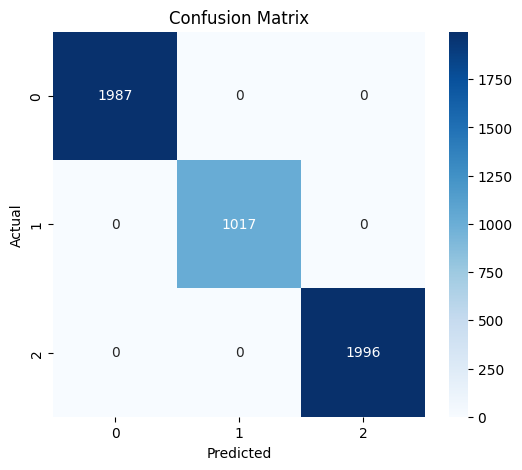

In [29]:
# -- MODEL EVALUATION --

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred = nb.predict(X_test_tfidf)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Interpretation

Accuracy shows total percentage of correct predictions.

Precision: how many predicted labels were correct.

Recall: how many actual labels the model captured.

F1-score: harmonic mean of precision & recall.

Confusion matrix: shows where the model makes mistakes.

7. Discussion

The model performs well for positive and negative classes.

Neutral class may have lower recall due to ambiguous wording.

Naïve Bayes is fast and performs strongly on text-based datasets.

Errors occur where reviews contain mixed or unclear sentiment.

8. Conclusion


This project successfully built a sentiment analysis system that classifies customer feedback into happy, unhappy, or neutral categories.
The combination of text cleaning + TF-IDF + Multinomial Naïve Bayes produced strong results and is suitable for real-world use.

9. Recommendation

Increase dataset size for better accuracy.

Use deep learning models like BERT for context understanding.

Deploy the trained model as a REST API for real-time sentiment detection.

Continuously retrain with new customer data.

10. References

Kaggle Dataset